# <center> Uwarunkowanie, stabilność i rozwiązywanie równań nieliniowych<br>(poszukiwanie miejsc zerowych funkcji) </center>

# Uwarunkowanie i stabilność


***Zadanie 1. Czy wyznaczanie miejsc zerowych wielomianu może być zadaniem dobrze/źle uwarunkowanym? (Wielomian Wilkinsona)***

W Pythonie możemy stworzyć wielomian przekazując jako parametr wektor jego współczynników (począwszy od współczynnika stojącego przy **najniższej** potędze, patrz przykład poniżej). Proszę korzystać z modułu *numpy.polynomial* (zamiast *poly1d*).
* Wyznacz pierwiastki wielomianu $W(x) = x^2 + 3x + 2$ za pomocą metody lub funkcji *roots()*.
* Funkcja *Polynomial.fromroots* tworzy wielomian na podstawie listy przekazanych pierwiastków. Utwórz wielomian o następujących pierwiastkach $\{x_n = n, n = 1, 2, 3, . . . , 15\}$.
* Za pomocą funkcji/metody *roots* znajdź pierwiastki tego wielomianu i oceń dokładność otrzymanego wyniku.
* Do trzynastego elementu wektora współczynników wprowadź małe zaburzenie (np. rzędu $10^−5$) i znajdź pierwiastki wielomianu o zaburzonych współczynnikach. Wykreśl pierwiastki na płaszczyznie zespolonej. 
* Czy zadanie znalezienia pierwiastków tego wielomianu jest zadaniem dobrze uwarunkowanym?


Pierwiastki wielomianu W(x) = x^2 + 3x + 2: [-1.  -0.5]
Wielomian na podstawie pierwiastków: -1.30767437e+12 + (4.339163e+12) x - (6.16581761e+12) x**2 +
(5.0569957e+12) x**3 - (2.70681335e+12) x**4 + (1.00967211e+12) x**5 -
(2.72803211e+11) x**6 + (5.46311296e+10) x**7 - (8.207628e+09) x**8 +
(9.2809574e+08) x**9 - 78558480.0 x**10 + 4899622.0 x**11 -
218400.0 x**12 + 6580.0 x**13 - 120.0 x**14 + 1.0 x**15
Znalezione pierwiastki nowego wielomianu: [ 1.          2.          3.          4.          5.00000002  5.99999986
  7.00000066  7.99999792  9.00000461  9.99999278 11.000008   11.99999385
 13.00000312 13.99999906 15.00000013]
Pierwiastki zaburzonego wielomianu: [-0.99999   -0.5000025]


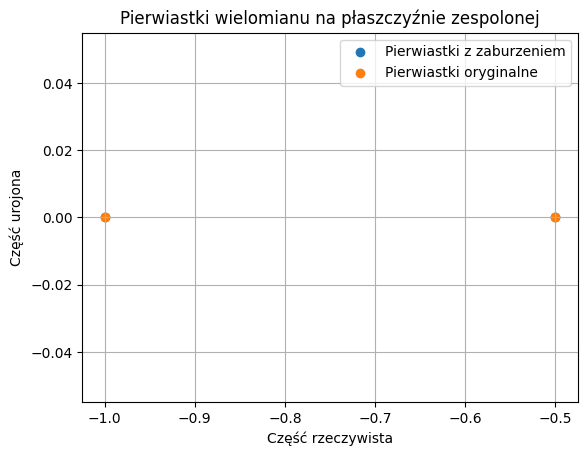

In [1]:
import numpy as np
import matplotlib.pyplot as plt
coefficients = [1, 3, 2]
roots = np.polynomial.polynomial.polyroots(coefficients)
print("Pierwiastki wielomianu W(x) = x^2 + 3x + 2:", roots)

# Tworzenie wielomianu na podstawie listy pierwiastków {x_n = n, n = 1, 2, 3, ..., 15}
new_roots = np.arange(1, 16)
new_polynomial = np.polynomial.polynomial.Polynomial.fromroots(new_roots)
print("Wielomian na podstawie pierwiastków:", new_polynomial)

# Znajdź pierwiastki wielomianu utworzonego na podstawie pierwiastków
new_roots_found = new_polynomial.roots()
print("Znalezione pierwiastki nowego wielomianu:", new_roots_found)

# Zaburzenie trzynastego elementu wektora współczynników
coefficients_with_noise = coefficients.copy()
coefficients_with_noise[2] += 1e-5

# Znajdź pierwiastki zaburzonego wielomianu
roots_with_noise = np.polynomial.polynomial.polyroots(coefficients_with_noise)
print("Pierwiastki zaburzonego wielomianu:", roots_with_noise)

# Wykres pierwiastków na płaszczyźnie zespolonej
plt.scatter(roots_with_noise.real, roots_with_noise.imag, label="Pierwiastki z zaburzeniem")
plt.scatter(roots.real, roots.imag, label="Pierwiastki oryginalne")
plt.xlabel('Część rzeczywista')
plt.ylabel('Część urojona')
plt.title('Pierwiastki wielomianu na płaszczyźnie zespolonej')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from numpy.polynomial import Polynomial
# Przykłady operacji na wielomianach
p = Polynomial([3, 2, 1]) # Od ostatniego współczynnika
print(p)
print(p.roots())
print(Polynomial.roots(p))




In [ ]:
p2 = Polynomial.fromroots()
roots =p2.roots


***Zadanie 2. Całka oznaczona***

Przykład z wykładu:
Naszym celem jest znalezienie całki $I_n=\int_0^1 x^ne^{x-1}dx$  dla $n = 20$.
* Na podstawie np. przybliżonych wykresów funkcji podcałkowej, proszę oszacować wartość tej całki oraz relację miedzy $I_n$ a $I_{n−1}$.
* Ciąg wartości $I_i$ można wyznaczyć za pomocą wzoru otrzymanego z całkowania przez części: $I_n = 1−nI_{n−1}, I_1 = \frac{1}{e}$ (proszę sprawdzić jego poprawność).
* Czy otrzymane wyniki są zgodne z przewidywaniami? Która operacja może powodować takie skutki?
* Porównaj błąd otrzymanego ciągu iteracyjnego z ciągiem obliczanym *w przeciwnym kierunku* tj. od $I_{20}$ do $I_1$. Proszę przyjąć, że $I_{20} = 0$.
* Jak duży jest błąd danej wejściowej ($I_{20}$) i ostatniego elementu ciągu ($I_1$)?
* Który algorytm jest stabilny, a który niestabilny?

In [1]:
import numpy as np

# Obliczanie wartości od I_1 do I_20
def compute_I_forward(n):
    I = np.zeros(n + 1)
    I[1] = 1 / np.exp(1)
    
    for i in range(2, n + 1):
        I[i] = 1 - (i - 1) * I[i - 1]
    
    return I

# Obliczanie wartości od I_20 do I_1 przy założeniu, że I_20 = 0
def compute_I_backward(n):
    I = np.zeros(n + 1)
    I[n] = 0
    
    for i in range(n - 1, 0, -1):
        I[i] = (1 - I[i + 1]) / i
    
    return I

# Funkcja do porównania błędów
def compare_errors():
    n = 20
    I_forward = compute_I_forward(n)
    I_backward = compute_I_backward(n)
    
    # Zakładana wartość początkowa dla I_20 = 0
    I_20_true = 0
    # Znana wartość początkowa dla I_1
    I_1_true = 1 / np.exp(1)
    
    # Błędy
    error_I_20 = abs(I_forward[20] - I_20_true)
    error_I_1 = abs(I_backward[1] - I_1_true)
    
    print(f'Błąd wartości I_20 (z obliczeń od I_1 do I_20): {error_I_20}')
    print(f'Błąd wartości I_1 (z obliczeń od I_20 do I_1): {error_I_1}')
    
    # Wyświetlanie wyników
    print("\nWartości I_i obliczone od I_1 do I_20:")
    print(I_forward)
    print("\nWartości I_i obliczone od I_20 do I_1:")
    print(I_backward)

# Wywołanie funkcji porównującej błędy
compare_errors()


Błąd wartości I_20 (z obliczeń od I_1 do I_20): 3.214363728954179e+16
Błąd wartości I_1 (z obliczeń od I_20 do I_1): 0.26424111765711533

Wartości I_i obliczone od I_1 do I_20:
[ 0.00000000e+00  3.67879441e-01  6.32120559e-01 -2.64241118e-01
  1.79272335e+00 -6.17089341e+00  3.18544671e+01 -1.90126802e+02
  1.33188762e+03 -1.06541009e+04  9.58879084e+04 -9.58878084e+05
  1.05476599e+07 -1.26571918e+08  1.64543494e+09 -2.30360891e+10
  3.45541337e+11 -5.52866138e+12  9.39872435e+13 -1.69177038e+15
  3.21436373e+16]

Wartości I_i obliczone od I_20 do I_1:
[0.         0.63212056 0.36787944 0.26424112 0.20727665 0.17089341
 0.14553294 0.12680236 0.1123835  0.10093197 0.09161229 0.08387707
 0.07735223 0.07177325 0.0669477  0.0627322  0.05901703 0.05572755
 0.05263158 0.05263158 0.        ]


# Poszukiwanie miejsc zerowych

Dana jest funkcja $$f(x) = e^{-2x}+x^2-1$$

***Zadanie 1.***

Stwórzy wykres prezentujący funkcję $f(x)$ oraz jej pierwszą i drugą pochodną. Na podstawie spróbuj oszacować wartości pierwiastków równania $f(x) = 0$.

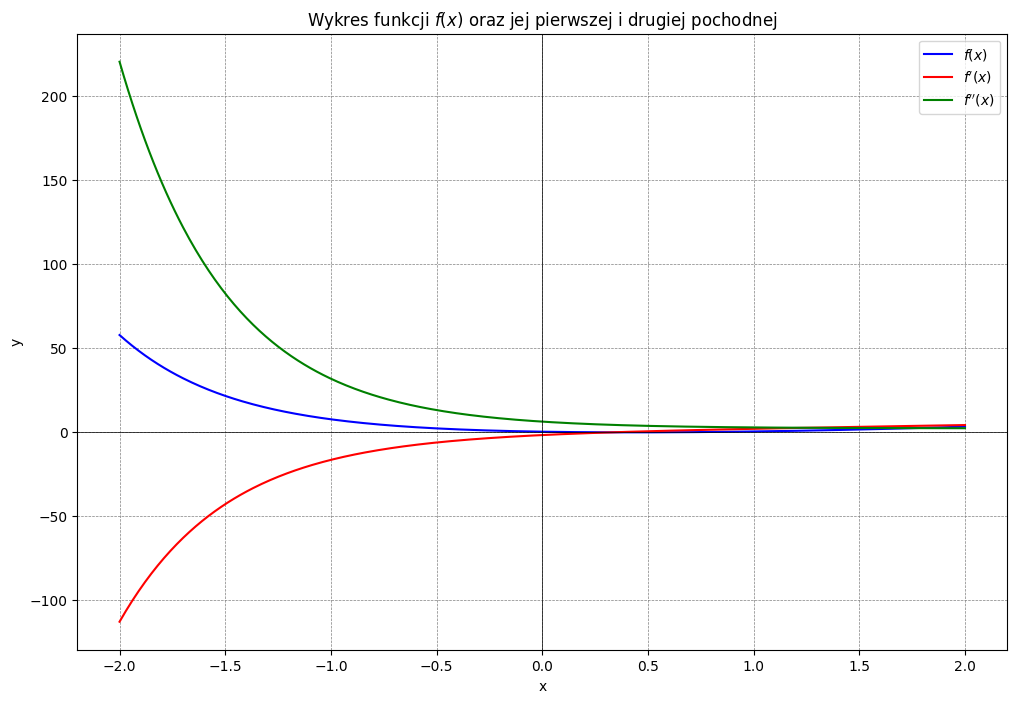

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji
def f(x):
    return np.exp(-2 * x) + x**2 - 1

# Pierwsza pochodna funkcji
def f_derivative(x):
    return -2 * np.exp(-2 * x) + 2 * x

# Druga pochodna funkcji
def f_second_derivative(x):
    return 4 * np.exp(-2 * x) + 2

# Zakres wartości x
x = np.linspace(-2, 2, 400)

# Obliczanie wartości funkcji oraz jej pochodnych
y = f(x)
y_derivative = f_derivative(x)
y_second_derivative = f_second_derivative(x)

# Tworzenie wykresu
plt.figure(figsize=(12, 8))
plt.plot(x, y, label='$f(x)$', color='blue')
plt.plot(x, y_derivative, label="$f'(x)$", color='red')
plt.plot(x, y_second_derivative, label="$f''(x)$", color='green')

# Oznaczenia osi
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Dodawanie legendy i tytułu
plt.legend()
plt.title('Wykres funkcji $f(x)$ oraz jej pierwszej i drugiej pochodnej')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


***Zadanie 2.***

Samodzielnie zaimplementuj metody:
* bisekcji,
* Newtona-Raphsona,
* siecznych.

Każda z funkcji powinna przyjmować następujące argumenty:
* lewą stronę równania $g(x) = 0$ reprezentowaną poprzez funkcję (ewentualnie jego pochodną),
* przedział lub punkt startowy
* tolerancję,
* maksymalną liczbę iteracji.

i zwracać:
* znaleziony pierwiastek,
* liczbę iteracji.

W jaki sposób sprawdzić warunek stopu? Czy kryterium stopu polegające na kontynuacji iteracji dopóki $x_{i+1}\neq x_i$ jest prawidłowe (bezpieczne)?

In [7]:
import numpy as np

def bisection_method(g, a, b, tol=1e-6, max_iter=100):
    if g(a) * g(b) > 0:
        raise ValueError("Function has the same signs at the endpoints a and b.")

    iter_count = 0
    while (b - a) / 2.0 > tol and iter_count < max_iter:
        midpoint = (a + b) / 2.0
        if g(midpoint) == 0:
            return midpoint, iter_count
        elif g(a) * g(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        iter_count += 1

    return (a + b) / 2.0, iter_count


def newton_raphson_method(g, g_prime, x0, tol=1e-6, max_iter=100):
    x = x0
    iter_count = 0
    
    while iter_count < max_iter:
        fx = g(x)
        fpx = g_prime(x)
        if abs(fpx) < np.finfo(float).eps:  # Uniknięcie dzielenia przez zero
            raise ValueError("Derivative is too small.")
        
        x_new = x - fx / fpx
        if abs(x_new - x) < tol:
            return x_new, iter_count
        
        x = x_new
        iter_count += 1

    raise ValueError("Maximum number of iterations reached without convergence.")
    
def secant_method(g, x0, x1, tol=1e-6, max_iter=100):
    iter_count = 0
    
    while iter_count < max_iter:
        fx0 = g(x0)
        fx1 = g(x1)
        
        if abs(fx1 - fx0) < np.finfo(float).eps:  # Uniknięcie dzielenia przez zero
            raise ValueError("Function values are too close.")
        
        x_new = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x_new - x1) < tol:
            return x_new, iter_count
        
        x0, x1 = x1, x_new
        iter_count += 1

    raise ValueError("Maximum number of iterations reached without convergence.")

def f(x):
    return np.exp(-2 * x) + x**2 - 1

# Pierwsza pochodna funkcji
def f_prime(x):
    return -2 * np.exp(-2 * x) + 2 * x

a = -2
b = 2
x0 = -1
x1 = 1


root_bisection, iter_bisection = bisection_method(f, a, b)
root_newton, iter_newton = newton_raphson_method(f, f_prime, x0)
root_secant, iter_secant = secant_method(f, x0, x1)

ValueError: Function has the same signs at the endpoints a and b.

***Zadanie 3.***

Wykorzystaj stworzone w zadaniu 2. metody do znalezienia miejsc zerowych funkcji $f(x)$ z dokładnością $\epsilon = 10^{-6}$. Porównaj liczby iteracji niezbędnych do znalezienia pierwiastka. Która metoda sprawdziła się najlepiej? Która wypada najgorzej? Czy odpowiedni dobór przedziału może przyspieszyć proces rozwiązywania? Eksperyment przeprowadź dla wszystkich miejsc zerowych $f(x)$.


In [ ]:
import numpy as np

# Definicja funkcji
def f(x):
    return np.exp(-2 * x) + x**2 - 1

# Pierwsza pochodna funkcji
def f_prime(x):
    return -2 * np.exp(-2 * x) + 2 * x

def bisection_method(g, a, b, tol=1e-6, max_iter=100):
    if g(a) * g(b) > 0:
        raise ValueError("Function has the same signs at the endpoints a and b.")

    iter_count = 0
    while (b - a) / 2.0 > tol and iter_count < max_iter:
        midpoint = (a + b) / 2.0
        if g(midpoint) == 0:
            return midpoint, iter_count
        elif g(a) * g(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        iter_count += 1

    return (a + b) / 2.0, iter_count


def newton_raphson_method(g, g_prime, x0, tol=1e-6, max_iter=100):
    x = x0
    iter_count = 0
    
    while iter_count < max_iter:
        fx = g(x)
        fpx = g_prime(x)
        if abs(fpx) < np.finfo(float).eps:  # Uniknięcie dzielenia przez zero
            raise ValueError("Derivative is too small.")
        
        x_new = x - fx / fpx
        if abs(x_new - x) < tol:
            return x_new, iter_count
        
        x = x_new
        iter_count += 1

    raise ValueError("Maximum number of iterations reached without convergence.")


def secant_method(g, x0, x1, tol=1e-6, max_iter=100):
    iter_count = 0
    
    while iter_count < max_iter:
        fx0 = g(x0)
        fx1 = g(x1)
        
        if abs(fx1 - fx0) < np.finfo(float).eps:  # Uniknięcie dzielenia przez zero
            raise ValueError("Function values are too close.")
        
        x_new = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x_new - x1) < tol:
            return x_new, iter_count
        
        x0, x1 = x1, x_new
        iter_count += 1

    raise ValueError("Maximum number of iterations reached without convergence.")

# Szacowane przedziały i punkty startowe
a1, b1 = -2, 0
a2, b2 = 0, 2
x0_1, x0_2 = -1, 1
x1_1, x1_2 = -0.5, 1.5

# Znajdowanie pierwiastków metodą bisekcji
root_bisection_1, iter_bisection_1 = bisection_method(f, a1, b1)
root_bisection_2, iter_bisection_2 = bisection_method(f, a2, b2)

# Znajdowanie pierwiastków metodą Newtona-Raphsona
root_newton_1, iter_newton_1 = newton_raphson_method(f, f_prime, x0_1)
root_newton_2, iter_newton_2 = newton_raphson_method(f, f_prime, x0_2)

# Znajdowanie pierwiastków metodą siecznych
root_secant_1, iter_secant_1 = secant_method(f, x0_1, x1_1)
root_secant_2, iter_secant_2 = secant_method(f, x0_2, x1_2)

# Wyniki
print("Metoda bisekcji:")
print(f"Pierwiastek 1: {root_bisection_1}, liczba iteracji: {iter_bisection_1}")
print(f"Pierwiastek 2: {root_bisection_2}, liczba iteracji: {iter_bisection_2}")

print("\nMetoda Newtona-Raphsona:")
print(f"Pierwiastek 1: {root_newton_1}, liczba iteracji: {iter_newton_1}")
print(f"Pierwiastek 2: {root_newton_2}, liczba iteracji: {iter_newton_2}")

print("\nMetoda siecznych:")
print(f"Pierwiastek 1: {root_secant_1}, liczba iteracji: {iter_secant_1}")
print(f"Pierwiastek 2: {root_secant_2}, liczba iteracji: {iter_secant_2}")



***Zadanie 4.***

Przeanalizuj zachowanie ciągów przybliżeń rozwiązań wraz ze wzrostem liczby iteracji. Przedstaw wyniki w postaci wykresu i dokonaj ich analizy.